# Diamond price prediction - Data overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Train data overview
* carat (quilates): weight of the diamond 
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal) 
* color: diamond colour, from J (worst) to D (best)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)
* x: length in mm
* y: width in mm
* z: depth in mm
* price: price in USD

In [2]:
diamonds = pd.read_csv("../data/diamonds_train.csv", index_col = False)
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


In [3]:
# Drop column Unnamed as it does not add any value
diamonds.drop(columns = ["Unnamed: 0"], inplace = True)

# Type of data
#diamonds.dtypes # Data type seems OK
#diamonds.isnull().sum() # No null values!

# Values in categorical columns
diamonds.cut.value_counts()
#diamonds.color.value_counts()
#diamonds.clarity.value_counts()

Ideal        16090
Premium      10339
Very Good     9036
Good          3694
Fair          1186
Name: cut, dtype: int64

#### Regression plot

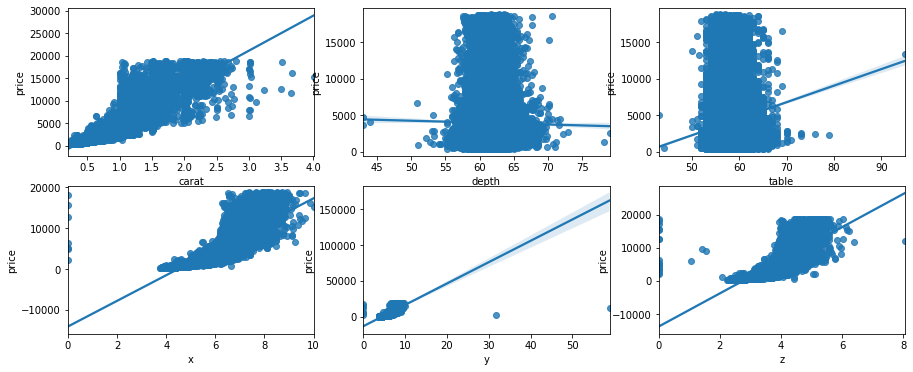

In [4]:
fig, sub = plt.subplots(2, 3, figsize= (15,6))
numeric = ["carat", "depth", "table", "x", "y", "z"]
for i, col in enumerate(numeric):
    sns.regplot(x=col, y="price", data=diamonds, ax = sub[i//3, i%3])

# Conclusion:
# Carat at dimensions could follow a linear regression
# The dataset contains ouliers

There are diamonds that have some dimension equal to zero, possibly because the value was not scored. Since this is an incorrect value and diamonds are not 2D, we'll eliminate these rows when designing the model.

#### Correlation matrix

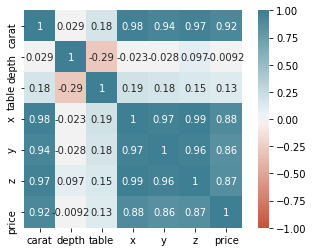

In [5]:
df_num = diamonds[numeric + ["price"]]
corr_num = df_num.corr()
ax = sns.heatmap( corr_num, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot = True,
    square=True
)
# Conclusion:
# There is a very high correlation between the price, the carat, and the x, y, z measures

#### Boxplot: Looking for outliers

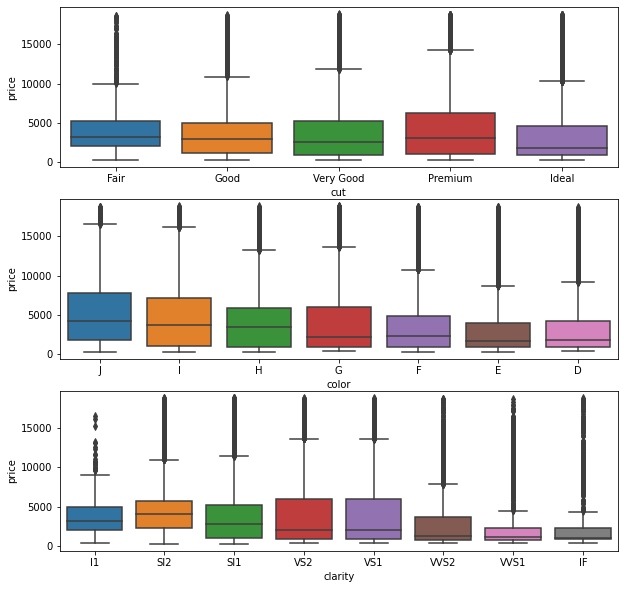

In [6]:
fig, sub = plt.subplots(3, 1, figsize= (10,10))
sns.boxplot(x="cut", y="price", data=diamonds, ax = sub[0],
            order =["Fair", "Good", "Very Good", "Premium", "Ideal"])
sns.boxplot(x="color", y="price", data=diamonds, ax = sub[1],
            order =["J", "I", "H", "G", "F", "E", "D"]) # D lightest color
sns.boxplot(x="clarity", y="price", data=diamonds, ax = sub[2],
            order =["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]) # IF is the best

# Conclusion:
# With the boxplot we can see that there are no significant price differences related to colour, cut and 
# clarity.

#### Remove outliers

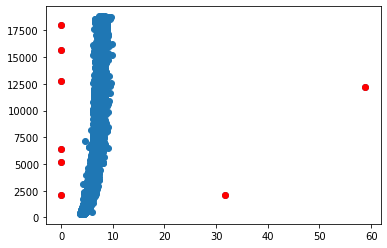

In [53]:
#sns.regplot(x="y", y="price", data=diamonds[["y", "price"]])
#diamonds[["y", "price"]].plot(kind = "scatter", x="y", y="price")
#diamonds[["y", "price"]][(diamonds.y==0) & (diamonds.y>30)].plot(kind = "scatter", x="y", y="price")
plt.scatter(diamonds["y"], diamonds["price"]);

plt.scatter(diamonds["y"][(diamonds.y==0)==True], 
            diamonds["price"][(diamonds.y==0)==True], color="red");
plt.scatter(diamonds["y"][(diamonds.y>30)==True], 
            diamonds["price"][(diamonds.y>30)==True], color="red");

# Data validation overview

In [19]:
validation = pd.read_csv("../data/diamonds_test.csv", index_col = False)
validation.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [20]:
validation.drop(columns = ["Unnamed: 0"], inplace = True)

# Type of data
#validation.dtypes # Data type seems OK
#validation.isnull().sum() # No null values!

# Values in categorical columns
#diamonds.cut.value_counts()
#diamonds.color.value_counts()
#diamonds.clarity.value_counts()

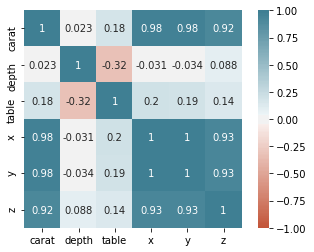

In [21]:
# Correlation matrix

df_num = validation[numeric]
corr_num = df_num.corr()
ax = sns.heatmap( corr_num, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot = True,
    square=True
)
# Conclusion:
# There is a very high correlation between the price, the carats, and the x, y, z measures